# Pergunta: Países com IDH mais elevados costumam ter maior índice de percepção de corrupção (quanto a corrupção é percebida em um país)? E uma educação mais igualitária em termos de gênero?
# Ano de estudo: 2015

As variáveis escolhidas para esta análise são: razão entre mulheres e homens nas escolas e índice de percepção de corrupção, sendo que, maior este índice, menor a corrupção no país.
Como uma primeira hipótese, é de se esperar que para a primeira variável, quanto maior o IDH, mais a razão seria próxima de 1, o que sugeriria que a educação é igualitaria em termos de gênero. Entretanto, esta colocação é simples de mais, pois não considera fatores que possam alterar a razão, como existirem mais homens ou mulheres com idade para frequentarem as escolas. Ou seja, se um país tem mais homens crianças, mesmo que todas as crianças fossem às escolas, a razão seria diferente de um.
Para a segunda variavel, é de se esperar que países com IDH mais elevados tenham uma índice de corrupção menor e portanto, índice de percepção de corrupção maior. 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [23]:
#selecionando o dado razão entre mulheres e homens nas escolas nos países

dados1 = pd.read_excel('razao.xlsx')
dados1.loc[:,['geo',2015]]
#renomeando as colunas

dados1=dados1.loc[ :,["geo", 2015]]
dados1.rename(columns={2015:"Mulheres/Homens nas escolas","geo":"País"},inplace=True)
dados1.set_index("País",inplace=True)

d10 = dados1.head(20)
d10





,Mulheres/Homens nas escolas
País,
Afghanistan,0.652
Albania,0.943
Algeria,NaN
Andorra,NaN
Angola,NaN
Antigua and Barbuda,0.977
Argentina,1.030
Armenia,1.040
Australia,0.925


In [21]:


#selecionando o o dado índice de percepção de corrupção


dados2 = pd.read_excel('corrupcao.xlsx')
dados2.head()
dados2.loc[:,['geo',2015]]

#renomeando as colunas

dados2=dados2.loc[ :,["geo", 2015]]
dados2.rename(columns={2015:"Índice de Percepção de Corrupção","geo":"País"},inplace=True)
dados2.set_index("País",inplace=True)

d20 = dados2.head(20)
d20



,Índice de Percepção de Corrupção
País,
Afghanistan,11.0
Albania,36.0
Algeria,36.0
Angola,15.0
Argentina,32.0
Armenia,35.0
Australia,79.0
Austria,76.0
Azerbaijan,29.0


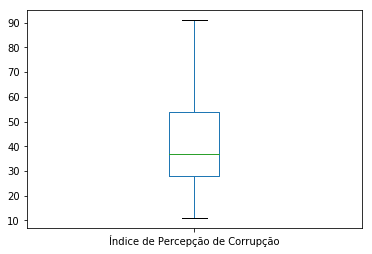

In [26]:
#Criando boxplot para o Índice de percepção de corrupção

df["Índice de Percepção de Corrupção"].plot.box();



O boxplot acima mostra que, infelizmente, a maioria dos países analisados têm um índice de percepção de corrupção beirando a 40, ou seja, a população destes não percebem a corrupção no mesmo.

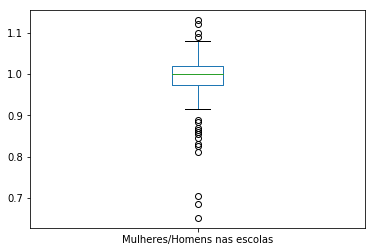

In [27]:
# criando bolxplot para razão entre homens e mulheres nas escolas

df['Mulheres/Homens nas escolas'].plot.box();

O boxplot acima mostra que a mediana da razão entre homens e mulheres nas escolas é 1, o que mostra que na maioria dos países, a quantidade de homens e mulheres nas escolas é quase igual. Mesmo assim, existem países com uma razão diferente de 1, tanto para mais quanto para menos, o que fica explícito nos outliers. Entretanto, estes outliers podem ser explicados tambem pelo fato de, em alguns países, o número de homens e mulheres com idade para irem às escolas serem diferentes. Sendo assim, mesmo que todas as crianças homens e mulheres de um país vão às escolas, se existem mais homens no país, a razão ficará abaixo de 1 e vice-versa. 

In [14]:
#selecionando o IDH por pais

dados3= pd.read_excel('IDH.xlsx')
dados3.loc[:,['geo',2015]]

#renomeando as colunas

dados3=dados3.loc[ :,["geo", 2015]]
dados3.rename(columns={2015:"IDH","geo":"País"},inplace=True)
dados3.set_index("País",inplace=True)

d30 = dados3.head(20)
d30




,IDH
País,
Afghanistan,0.479
Albania,0.764
Algeria,0.745
Andorra,0.858
Angola,0.533
Antigua and Barbuda,0.786
Argentina,0.827
Armenia,0.743
Australia,0.939


In [15]:
# juntando as colunas em um único dataframe

junto=[dados3,dados1,dados2]
first=junto.pop(0)

df=first.join(junto,how="inner")

df.head(20)

,IDH,Mulheres/Homens nas escolas,Índice de Percepção de Corrupção
País,,,
Afghanistan,0.479,0.652,11.0
Albania,0.764,0.943,36.0
Algeria,0.745,NaN,36.0
Angola,0.533,NaN,15.0
Argentina,0.827,1.030,32.0
Armenia,0.743,1.040,35.0
Australia,0.939,0.925,79.0
Austria,0.893,0.973,76.0
Azerbaijan,0.759,NaN,29.0


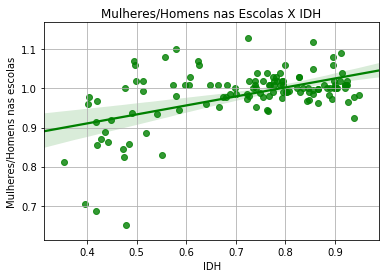

Correlação entre as varíaveis:0.47808961377642717


In [16]:
#criando gráfico IDH X razão entre mulheres e homens nas escolas

sns.regplot(df["IDH"],df["Mulheres/Homens nas escolas"], color=('green'))
plt.grid()
plt.title('Mulheres/Homens nas Escolas X IDH')
plt.grid(True)
plt.show()

# pegando a correlação entre IDH e a razão entre mulheres e homens nas escolas
corr1 = dados1['Mulheres/Homens nas escolas'].corr(dados3['IDH'])
print('Correlação entre as varíaveis:'+str(corr1))

 A partir do grafico acima, conclui-se que, na maioria dos casos, os países com IDH mais elevados tendem a ter uma razção mais próxima de 1. Isso mostra que o número de homens e mulheres nas escolas é muito próximo. Nota-se tambem que o caso em que o IDH é o mais baixo, a razão é menor que 1. Com isso, conclui-se que, neste país, o número de mulheres que frequenta escolas é maior que o de homens. Entretanto, percebe-se que não necessariamente países com IDH maiores têm uma razão mais próxima de 1. A correlação entra as variáveis é muito baixa, o que confirma o que foi dito. Outro fator que pode explicar a razão diferente de 1 é que em alguns países, existem mais homens ou mulheres crianças. Sendo assim, se o país tem mais mulheres crianças em geral e todas elas e os homens forem às escolas, a razão ficará acima de 1. Isso não significa que a educação é desigual, mas que existem mais mulheres do que homens crianças.

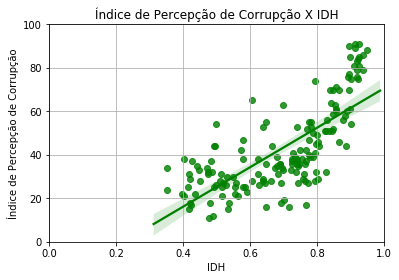

Correlação entre as varíaveis:0.7368173538284677


In [17]:
#criando gráfico IDH  x índice de precepção de corrupção

sns.regplot(df["IDH"],df["Índice de Percepção de Corrupção"], color=('green'))
plt.grid()
plt.title('Índice de Percepção de Corrupção X IDH')
plt.axis([0,1,0,100])
plt.grid(True)
plt.show()


#correlação entre IDH e o índice de percepção de corrupção
corr2 = dados2['Índice de Percepção de Corrupção'].corr(dados3['IDH'])
print('Correlação entre as varíaveis:'+str(corr2))

Segundo o site Gapminder.com, países que têm Índice de corrupção mais elevados são os países com menor índice de corrupção. A partir disso, presume-se que países com IDH mais elevados vão ter índice de percepção de corrupção elevados. Vê-se no gráfico que, em geral, essa hipótese se confirma, ou seja, países com maiores IDH são os países com maior índice de percepção de corrupção. Neste gráfico, a correlação é bem mais alta do que no anterior, o que mostra que as variáveis são mais influentes uma na outra. 

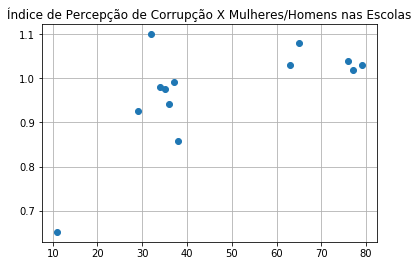

Correlação entre varíaveis:0.3758609983126993


In [18]:
#criando gráfico índice de perçepção de corrupção X razão entre mulheres e homens nas escolas

plt.plot(d20, d10,'o')
plt.grid()
plt.title('Índice de Percepção de Corrupção X Mulheres/Homens nas Escolas')
plt.grid(True)
plt.show()

#correlação entre razão entre homens e mulheres nas escolas e o índice de percepção de corrupção
corr3 = dados2['Índice de Percepção de Corrupção'].corr(dados1['Mulheres/Homens nas escolas'])
print('Correlação entre varíaveis:'+str(corr3))

O gráfico acima relaciona as duas variáveis escolhidas: Índice de Percepção de corrupçã o e razão entre homens e mulheres nas escolas. O gráfico mostra que em países com razão beirando à 1, o índice de percepção de corrupção varia muito. Ou seja, as duas variáveis não parecem ter nenhuma relação direta entre si. Esta ideia é confirmada pela baíxissima correlação entre as variáveis.

Por fim, vê-se que a hipótese colocada para a primeira variavel não se confirma pois a razão tende a 1 tanto para países com IDH altos quanto baixos. Entretanto, a colocação feita inicialmente sobre fatores que podem influenciar este número parece estar certa. 
já para a segunda variável, a hipótese se confirma e de fato, na maioria dos países quanto maior o IDH, maior o índice de percepção de corrupção.